<a href="https://colab.research.google.com/github/Oatthapong/Python/blob/main/Machine_Learning_Model_LSTM_Forecast_%E0%B8%A3%E0%B8%B2%E0%B8%84%E0%B8%B2%E0%B8%AB%E0%B8%B8%E0%B9%89%E0%B8%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow yfinance scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

In [ ]:
# ดึงข้อมูลหุ้น GOOG ตั้งแต่ปี 2020 ถึง 2024
ticker = "GOOG"
start_date = "2020-01-01"
end_date = "2024-12-31"

df = yf.download(ticker, start=start_date, end=end_date)

# ใช้ราคาปิดเป็นตัวแปรหลัก
data = df[['Close']].values

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2020-01-02,68.046204,68.084520,66.761289,66.761289,28132000
2020-01-03,67.712273,68.301485,66.960037,67.075290,23728000
2020-01-06,69.381882,69.495836,67.181800,67.181800,34646000
2020-01-07,69.338577,69.818801,69.191272,69.567496,30054000
2020-01-08,69.885002,70.246290,69.214176,69.275880,30560000
...,...,...,...,...,...
2024-12-23,195.766968,196.266399,191.411929,193.809192,15235900
2024-12-24,197.345184,197.445061,194.975874,195.946768,6809800


In [ ]:
data

array([[ 68.04620361],
       [ 67.71227264],
       [ 69.38188171],
       ...,
       [196.87571716],
       [193.81918335],
       [192.47073364]])

In [ ]:
# ปรับขนาดข้อมูล
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [ ]:
# สร้างชุดข้อมูลสำหรับ LSTM
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# กำหนด time step
time_step = 60
X, Y = create_dataset(data_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)


In [ ]:
# แบ่งชุดข้อมูล train/test
split = int(len(X) * 0.8)
X_train, Y_train = X[:split], Y[:split]
X_test, Y_test = X[split:], Y[split:]

In [ ]:
# สร้างโมเดล LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# ฝึกโมเดล
model.fit(X_train, Y_train, epochs=20, batch_size=16, validation_data=(X_test, Y_test))

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0393 - val_loss: 0.0032
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0032 - val_loss: 0.0056
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0023 - val_loss: 0.0057
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0026 - val_loss: 0.0034
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0016 - val_loss: 0.0030
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0015 - val_loss: 0.0050
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0014 - val_loss: 0.0036
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0013 - val_loss: 0.0031
Epoch 12/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0

In [ ]:
# พยากรณ์ 1 ปีข้างหน้า (252 วันทำการ)
def forecast_future(model, data, time_step, days=252):
    future_predictions = []
    last_data = data[-time_step:].reshape(1, time_step, 1)
    for _ in range(days):
        pred = model.predict(last_data)[0, 0]
        future_predictions.append(pred)
        last_data = np.append(last_data[:, 1:, :], [[[pred]]], axis=1)
    return scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

future_prices = forecast_future(model, data_scaled, time_step)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━

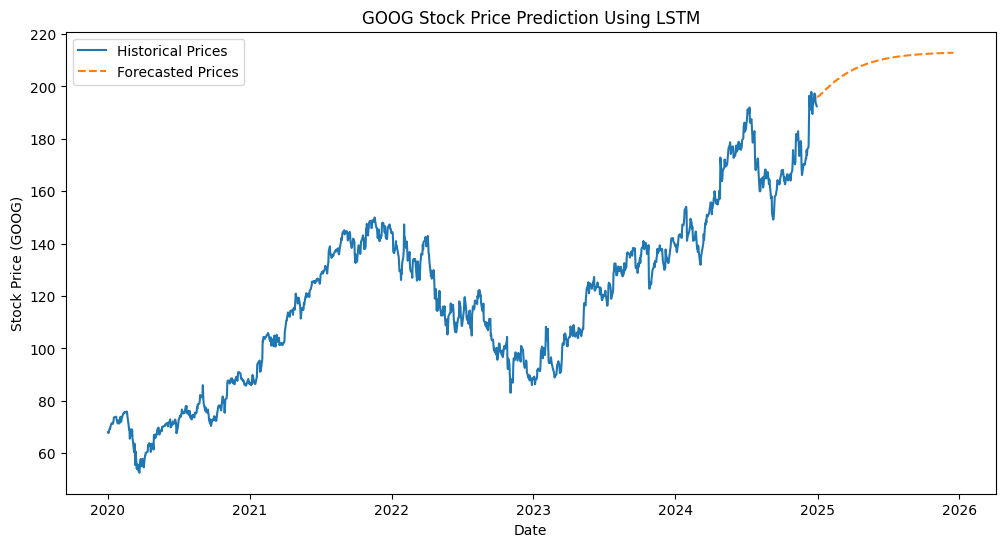

In [ ]:
# แสดงกราฟ
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Historical Prices')
future_dates = pd.date_range(start=df.index[-1], periods=len(future_prices) + 1, freq='B')[1:]
plt.plot(future_dates, future_prices, label='Forecasted Prices', linestyle='dashed')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price (GOOG)')
plt.title('GOOG Stock Price Prediction Using LSTM')
plt.show()